<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/Face-Shapes-Recognition/Face_Shapes_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("niten19/face-shape-dataset")

print("Path to dataset files:", path)

100%|██████████| 639M/639M [00:06<00:00, 109MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/niten19/face-shape-dataset/versions/2


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

faceshapes_classes = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
image_size = 60

data = []
labels = []

for i, faceshapes in enumerate(faceshapes_classes):
    folder = os.path.join(path, 'FaceShape Dataset', 'testing_set', faceshapes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(faceshapes_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(faceshapes_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.1674 - loss: 1.6104 - val_accuracy: 0.1700 - val_loss: 1.6134
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.2001 - loss: 1.6096 - val_accuracy: 0.1850 - val_loss: 1.6131
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2050 - loss: 1.6102 - val_accuracy: 0.1700 - val_loss: 1.6134
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2322 - loss: 1.6087 - val_accuracy: 0.1700 - val_loss: 1.6142
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.2056 - loss: 1.6084 - val_accuracy: 0.1700 - val_loss: 1.6140
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.2022 - loss: 1.6094 - val_accuracy: 0.1650 - val_loss: 1.6145
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2246 - loss: 1.6083 - val_accuracy: 0.1650 - val_loss: 1.6142
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.1852 - loss: 1.6090 - val_accuracy: 0.1650 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


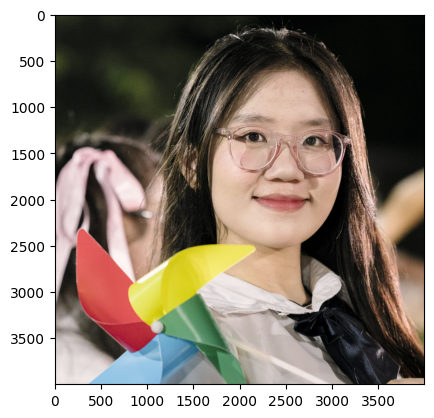

Predicted face shapes: Heart


In [21]:
import cv2

def preprocess_image(image_path, image_size=60):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/DSC00736.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(f"Predicted face shapes: {faceshapes_classes[predicted_class]}")